In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

In [2]:
df = pd.read_csv("face-recognition-pivot.csv")

In [3]:
df.head()

,file_x,file_y,decision,VGG-Face_cosine,VGG-Face_euclidean,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean,Facenet_euclidean_l2,DeepFace_cosine,DeepFace_euclidean,DeepFace_euclidean_l2
0,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[ 0 0 0]\n [ 0 0 0]\n [ 0 0 0]\n .....,Yes,0.1076,0.2939,0.4640,0.1564,6.8556,0.5592,0.2951,65.6765,0.7682
1,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[112 108 63]\n [111 106 64]\n [109 106 ...,Yes,0.1314,0.3245,0.5126,0.2157,8.2025,0.6568,0.3808,73.9771,0.8727
2,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Yes,0.1031,0.4133,0.4540,0.2728,9.2224,0.7386,0.2637,69.5387,0.7263
3,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[197 199 185]\n [197 199 185]\n [198 200 1...,Yes,0.1132,0.3065,0.4759,0.1301,6.2278,0.5102,0.3276,72.6463,0.8095
4,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Yes,0.1099,0.3396,0.4689,0.2024,7.9683,0.6362,0.2524,62.0719,0.7105


In [4]:
print(df.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   file_x                 718 non-null    object 
 1   file_y                 718 non-null    object 
 2   decision               718 non-null    object 
 3   VGG-Face_cosine        718 non-null    float64
 4   VGG-Face_euclidean     718 non-null    float64
 5   VGG-Face_euclidean_l2  718 non-null    float64
 6   Facenet_cosine         718 non-null    float64
 7   Facenet_euclidean      718 non-null    float64
 8   Facenet_euclidean_l2   718 non-null    float64
 9   DeepFace_cosine        718 non-null    float64
 10  DeepFace_euclidean     718 non-null    float64
 11  DeepFace_euclidean_l2  718 non-null    float64
dtypes: float64(9), object(3)
memory usage: 67.4+ KB
None


In [6]:
df_raw = df.copy()


In [7]:
models = ['VGG-Face', 'Facenet', 'DeepFace']
metrics = ['cosine', 'euclidean', 'euclidean_l2']

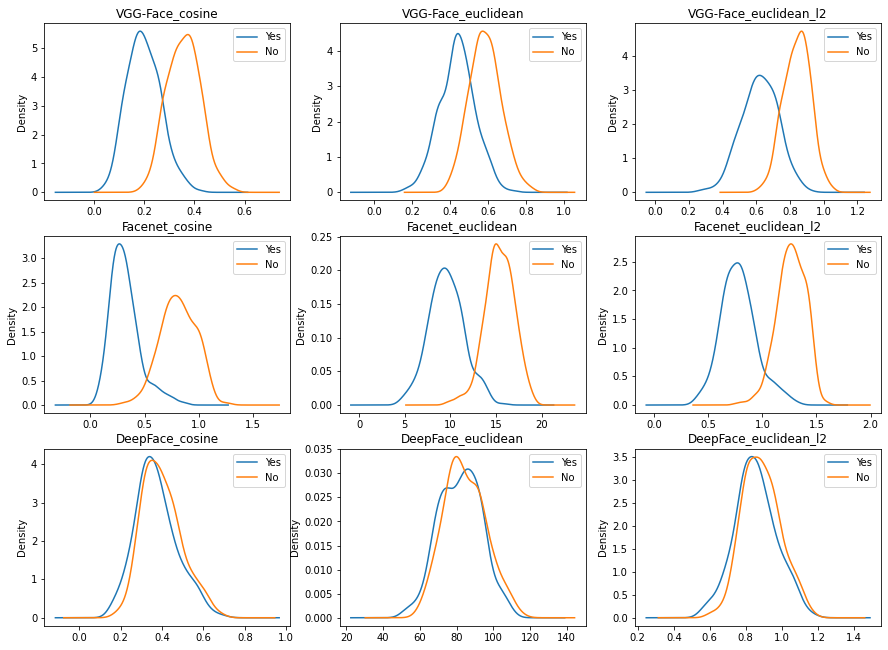

In [8]:
fig = plt.figure(figsize=(15, 15))

figure_idx = 1
for model in models:
    for metric in metrics:
        
        
        feature = '%s_%s' % (model, metric)

        ax1 = fig.add_subplot(4, 3, figure_idx)
        
        df[df.decision == "Yes"][feature].plot(kind='kde', title = feature, label = 'Yes', legend = True)
        df[df.decision == "No"][feature].plot(kind='kde', title = feature, label = 'No', legend = True)
        
        figure_idx = figure_idx + 1

plt.show()

In [9]:
columns = []
for model in models:
    for metric in metrics:
        if model == 'OpenFace' and metric == 'euclidean':
            continue
        else:
            feature = '%s_%s' % (model, metric)
            columns.append(feature)

columns.append("decision")

In [10]:
df = df[columns]


In [11]:

df.loc[df[df.decision == 'Yes'].index, 'decision'] = 1
df.loc[df[df.decision == 'No'].index, 'decision'] = 0

In [12]:
df.head()


,VGG-Face_cosine,VGG-Face_euclidean,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean,Facenet_euclidean_l2,DeepFace_cosine,DeepFace_euclidean,DeepFace_euclidean_l2,decision
0,0.1076,0.2939,0.4640,0.1564,6.8556,0.5592,0.2951,65.6765,0.7682,1
1,0.1314,0.3245,0.5126,0.2157,8.2025,0.6568,0.3808,73.9771,0.8727,1
2,0.1031,0.4133,0.4540,0.2728,9.2224,0.7386,0.2637,69.5387,0.7263,1
3,0.1132,0.3065,0.4759,0.1301,6.2278,0.5102,0.3276,72.6463,0.8095,1
4,0.1099,0.3396,0.4689,0.2024,7.9683,0.6362,0.2524,62.0719,0.7105,1


In [13]:
print(df.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VGG-Face_cosine        718 non-null    float64
 1   VGG-Face_euclidean     718 non-null    float64
 2   VGG-Face_euclidean_l2  718 non-null    float64
 3   Facenet_cosine         718 non-null    float64
 4   Facenet_euclidean      718 non-null    float64
 5   Facenet_euclidean_l2   718 non-null    float64
 6   DeepFace_cosine        718 non-null    float64
 7   DeepFace_euclidean     718 non-null    float64
 8   DeepFace_euclidean_l2  718 non-null    float64
 9   decision               718 non-null    object 
dtypes: float64(9), object(1)
memory usage: 56.2+ KB
None


# Train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_train, df_test = train_test_split(df, test_size=0.50, random_state=34)


In [15]:
target_name = "decision"

y_train = df_train[target_name].values
x_train = df_train.drop(columns=[target_name]).values

y_test = df_test[target_name].values
x_test = df_test.drop(columns=[target_name]).values

In [17]:
df_train

,VGG-Face_cosine,VGG-Face_euclidean,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean,Facenet_euclidean_l2,DeepFace_cosine,DeepFace_euclidean,DeepFace_euclidean_l2,decision
49,0.1402,0.4146,0.5295,0.1724,7.1828,0.5872,0.3126,85.0103,0.7907,1
98,0.2601,0.5408,0.7213,0.3425,10.2712,0.8276,0.4819,88.2212,0.9818,1
553,0.4205,0.8255,0.9170,1.0157,17.8151,1.4252,0.3595,81.0746,0.8480,0
539,0.3165,0.5050,0.7956,0.5686,13.1285,1.0664,0.3371,95.2135,0.8210,0
485,0.4273,0.5786,0.9244,1.0427,17.4541,1.4441,0.2488,74.4939,0.7054,0
...,...,...,...,...,...,...,...,...,...,...
324,0.2694,0.5037,0.7341,0.3324,10.0616,0.8153,0.3423,67.9704,0.8274,1
85,0.1263,0.3846,0.5025,0.2762,9.6872,0.7432,0.2422,64.1560,0.6960,1
490,0.3543,0.5119,0.8418,0.8168,15.2978,1.2781,0.4389,78.7791,0.9369,0
122,0.2948,0.6047,0.7679,0.3423,10.6335,0.8274,0.3632,85.8482,0.8523,1


# lightGBM

In [20]:
import lightgbm as lgb


In [21]:
features = df.drop(columns=[target_name]).columns.tolist()

lgb_train = lgb.Dataset(x_train, y_train, feature_name = features)
lgb_test = lgb.Dataset(x_test, y_test, feature_name = features)

In [22]:
params = {
    'task': 'train'
    , 'boosting_type': 'gbdt'
    , 'objective': 'multiclass'
    , 'num_class': 2
    , 'metric': 'multi_logloss'
    , 'force_col_wise': 'true'
}

In [23]:
lgb_train, lgb_test

(<lightgbm.basic.Dataset at 0x1861100ce50>,
 <lightgbm.basic.Dataset at 0x1861100c760>)

In [24]:
import time

In [25]:
start_time = time.time()

gbm = lgb.train(params, lgb_train, num_boost_round=400, early_stopping_rounds = 20 , valid_sets=[lgb_test])

end_time = time.time()


[LightGBM] [Info] Total Bins 1080
[LightGBM] [Info] Number of data points in the train set: 359, number of used features: 9
[LightGBM] [Info] Start training from score -0.668387
[LightGBM] [Info] Start training from score -0.718536
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's multi_logloss: 0.613996
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's multi_logloss: 0.548796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's multi_logloss: 0.494232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [26]:
print("Traning time execution: ", (end_time - start_time))

Traning time execution:  0.362001895904541


# Evaluation

In [27]:
predictions = gbm.predict(x_test)


In [28]:
prediction_classes = []
classified = 0

index = 0
for prediction in predictions:
    prediction_class = np.argmax(prediction)
    prediction_classes.append(prediction_class)
    
    actual = y_test[index]
    
    print("prediction is ",prediction_class," whereas actual is ",actual)
    if actual == prediction_class:
        classified = classified + 1
    
    index = index + 1

#print(classified," instances are classified in ",len(predictions)," instances") 
print("accuracy: ",round(100*classified/len(predictions),2),"%")

prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas

In [29]:
print(classified," instances are classified in ",len(predictions)," instances") 


337  instances are classified in  359  instances


In [30]:
print(y_test), print(prediction_classes)

[0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0
 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1
 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0
 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1
 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1
 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1]
[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 

(None, None)

In [31]:
prediction_classes_test = np.array(prediction_classes) 
y_test_arr = y_test


print(y_test_arr.tolist()), print(prediction_classes)

[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 

(None, None)

In [32]:
cm = confusion_matrix(y_test_arr.tolist(), prediction_classes_test)

In [33]:
cm

array([[166,   9],
       [ 13, 171]], dtype=int64)

In [34]:
tn, fp, fn, tp = cm.ravel()


In [35]:
tn, fp, fn, tp


(166, 9, 13, 171)

In [36]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [37]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  95.0 %
Recall:  92.93478260869566 %
F1 score  93.95604395604396 %
Accuracy:  93.87186629526462 %


In [38]:
idx = 0
prediction = gbm.predict(x_test)
prediction

array([[0.98701867, 0.01298133],
       [0.98189068, 0.01810932],
       [0.80168797, 0.19831203],
       [0.01220551, 0.98779449],
       [0.01408008, 0.98591992],
       [0.98774483, 0.01225517],
       [0.01220831, 0.98779169],
       [0.01671296, 0.98328704],
       [0.98834562, 0.01165438],
       [0.01079065, 0.98920935],
       [0.01238907, 0.98761093],
       [0.0121588 , 0.9878412 ],
       [0.80561474, 0.19438526],
       [0.01406753, 0.98593247],
       [0.98836441, 0.01163559],
       [0.20237577, 0.79762423],
       [0.98657262, 0.01342738],
       [0.69317888, 0.30682112],
       [0.98834389, 0.01165611],
       [0.78360328, 0.21639672],
       [0.02104504, 0.97895496],
       [0.64497682, 0.35502318],
       [0.98003822, 0.01996178],
       [0.98774439, 0.01225561],
       [0.98465203, 0.01534797],
       [0.98579098, 0.01420902],
       [0.93231541, 0.06768459],
       [0.98913084, 0.01086916],
       [0.1419425 , 0.8580575 ],
       [0.98719436, 0.01280564],
       [0.

In [39]:
prediction_classes = []
classified = 0

index = 0
for prediction in predictions:
    prediction_class = np.argmax(prediction)
    prediction_classes.append(prediction_class)
    
    actual = y_test[index]
    
    print("prediction is ",prediction_class," whereas actual is ",actual)
    if actual == prediction_class:
        classified = classified + 1
    
    index = index + 1

#print(classified," instances are classified in ",len(predictions)," instances") 
print("accuracy: ",round(100*classified/len(predictions),2),"%")

prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas

prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  0  whereas

# Real time

In [40]:
import lightgbm as lgb


In [41]:
idendities = {
  "Ariel_Sharon": [],
  "Colin_Powell": [],
  "Donald_Rumsfeld": [],
  "George_W_Bush": [],
  "Gerhard_Schroeder": [],
  "Hugo_Chavez": [],
  "Jean_Chretien": [],
  "John_Ashcroft": [],
  "Junichiro_Koizumi": [],
  "Tony_Blair": []
    
}

In [42]:
import os
from PIL import Image

for key, values in idendities.items():
    # Get the path to all the images
        for image in os.listdir("Dataset/DeepFace/{}".format(key)):
            path_string = os.path.join("Dataset/DeepFace/{}".format(key), image)
            image = Image.open(path_string)
            imgNp = np.array(image, "uint8")
            values.append(path_string)


In [43]:
#single prediction
idx = 0
verified = np.argmax(gbm.predict(np.expand_dims(df.iloc[idx].values[0:-1], axis=0).shape)[0]) == 1
print("verified: ", verified)

verified:  True


e:\pre-thesis\project\venv\lib\site-packages\lightgbm\basic.py:739: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')


In [44]:
gbm.predict(np.expand_dims(df.iloc[idx].values[0:-1], axis=0))

array([[0.0208469, 0.9791531]])

In [45]:
df.iloc[idx].values[0:-1]

array([0.1076, 0.2939, 0.464, 0.1564, 6.8556, 0.5592, 0.2951, 65.6765,
       0.7682], dtype=object)

In [47]:
df.iloc[idx]

VGG-Face_cosine           0.1076
VGG-Face_euclidean        0.2939
VGG-Face_euclidean_l2      0.464
Facenet_cosine            0.1564
Facenet_euclidean         6.8556
Facenet_euclidean_l2      0.5592
DeepFace_cosine           0.2951
DeepFace_euclidean       65.6765
DeepFace_euclidean_l2     0.7682
decision                       1
Name: 0, dtype: object

In [3]:
from deepface.basemodels import VGGFace, Facenet, FbDeepFace

In [49]:
pretrained_models = {}

pretrained_models["VGG-Face"] = VGGFace.loadModel()
print("VGG-Face loaded")

pretrained_models["Facenet"] = Facenet.loadModel()
print("Facenet loaded")

pretrained_models["DeepFace"] = FbDeepFace.loadModel()
print("FbDeepFace loaded")

VGG-Face loaded
Facenet loaded
FbDeepFace loaded


In [51]:
models = ['VGG-Face', 'Facenet', 'DeepFace']
metrics = ['cosine', 'euclidean', 'euclidean_l2']

In [4]:
from deepface import DeepFace

In [86]:
distances = []
demolist = {}

result = pd.DataFrame()

for model in models:
        for metric in metrics:
            
            print("Processing ",model," ",metric)
            
            if model == 'OpenFace' and metric == 'euclidean': #this returns same with openface euclidean l2
                continue
            else:
                resp_obj = DeepFace.verify("Test_img/George_W_Bush_0142.jpg", "Test_img/George_W_Bush_0143.jpg"
                                           , model_name = model
                                           , model = pretrained_models[model]
                                           , distance_metric = metric
                                           , detector_backend = 'mtcnn'
                                           , enforce_detection = False)
                list = {}
                distance = round(resp_obj["distance"], 4)
                print(distance)
#                 distances.append(distance)
                list = {'{}_{}'.format(model, metric): distance} 
                print(list)
                demolist.update(list)

        
                
print(distances,demolist)

Processing  VGG-Face   cosine
0.2056
{'VGG-Face_cosine': 0.2056}
Processing  VGG-Face   euclidean
0.3978
{'VGG-Face_euclidean': 0.3978}
Processing  VGG-Face   euclidean_l2
0.6412
{'VGG-Face_euclidean_l2': 0.6412}
Processing  Facenet   cosine
0.3752
{'Facenet_cosine': 0.3752}
Processing  Facenet   euclidean
11.1037
{'Facenet_euclidean': 11.1037}
Processing  Facenet   euclidean_l2
0.8663
{'Facenet_euclidean_l2': 0.8663}
Processing  DeepFace   cosine
0.389
{'DeepFace_cosine': 0.389}
Processing  DeepFace   euclidean
70.8544
{'DeepFace_euclidean': 70.8544}
Processing  DeepFace   euclidean_l2
0.882
{'DeepFace_euclidean_l2': 0.882}
[] {'VGG-Face_cosine': 0.2056, 'VGG-Face_euclidean': 0.3978, 'VGG-Face_euclidean_l2': 0.6412, 'Facenet_cosine': 0.3752, 'Facenet_euclidean': 11.1037, 'Facenet_euclidean_l2': 0.8663, 'DeepFace_cosine': 0.389, 'DeepFace_euclidean': 70.8544, 'DeepFace_euclidean_l2': 0.882}


In [87]:
distances.append(demolist)

In [88]:
result = pd.DataFrame(distances)

In [89]:
result.values

array([[ 0.2056,  0.3978,  0.6412,  0.3752, 11.1037,  0.8663,  0.389 ,
        70.8544,  0.882 ]])

In [90]:
gbm.predict(result)[0]

array([0.02096485, 0.97903515])

In [91]:
verified = np.argmax(gbm.predict(result)[0]) == 1
print(verified)

True


In [92]:
def recognition_function(img1, img2):
    data = []
    demolist = {}
    for model in models:
            for metric in metrics:
                if model == 'OpenFace' and metric == 'euclidean': #this returns same with openface euclidean l2
                    continue
                else:
                    resp_obj = DeepFace.verify(img1, img2
                                               , model_name = model
                                               , model = pretrained_models[model]
                                               , distance_metric = metric
                                               , detector_backend = 'mtcnn'
                                               , enforce_detection = False)
                    list = {}
                    distance = round(resp_obj["distance"], 4)
                    list = {'{}_{}'.format(model, metric): distance} 
                    demolist.update(list)
                    
    data.append(demolist)
    result = pd.DataFrame(data)
    print(result.values)
    verified = np.argmax(gbm.predict(result)[0]) == 1 # 1 is the same class => verified returns true if the same class.
    
    return verified

In [96]:
recognition_function("Test_img/Tony_Blair_0044.jpg", "Test_img/Tony_Blair_0112.jpg")

[[ 0.3043  0.4596  0.7801  0.343  10.1656  0.8282  0.3438 57.4184  0.8292]]


True

In [75]:
df_test = DeepFace.find(img_path = "Test_img/demo1.jpg", db_path = "Dataset/DeepFace", model_name = "Ensemble")


Loading VGG-Face:   0%|          | 0/4 [00:00<?, ?it/s]       

Ensemble learning enabled


Finding representations:  22%|██▏       | 18/83 [03:07<11:16, 10.41s/it] 


KeyboardInterrupt: 

In [81]:
deepface_ensemble = lgb.Booster(model_file= 'face-recognition-ensemble-model.txt')


In [85]:
deepface_ensemble

In [21]:
demo1 = "/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMVFRUXGBgXFxUXFRcXFxUaGBcXGBUWFRUYHSggGBolHRgXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGi0lHSUtLS0tLS0tLS0rLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAQMAwgMBIgACEQEDEQH/xAAcAAAABwEBAAAAAAAAAAAAAAAAAQIDBAUHBgj/xABDEAABBAAEAwUEBwYFAwUBAAABAAIDEQQSITEFQVEGEyJhcQeBkaEyQlKxwdHwFCMzYqLhcoKSsvEkU8IlNDVzkxX/xAAZAQADAQEBAAAAAAAAAAAAAAAAAQIDBAX/xAAkEQACAgICAgMAAwEAAAAAAAAAAQIRAyESMQRBEyJRIzJh8P/aAAwDAQACEQMRAD8AyoI0QRlegcw1PsmRuE7iNk23cLKXZpHoteHyAZgb2UyN+rR0CgcPcA430QbifvXLmT5MvG1RZE/eoHEn+Kv1zRS4v6XupRsZMC6/ILKK2bctFzwM+D3pvDn/AKhyHAnjKUWD/wDcOXNX8sjrk/4onZYfYKQ1M4OMuAAF/iugwfZjEPAplf4gR86pOr6OZlMguif2NxI5NPo781V4zhcsWkkbm+7Q+hGiGmu0K0QElwR2kPekMi4gLle1UXhDuhXUTuXPdpT+696qD+yCXRyRTjXkBNhAOrkupmIt5tXXZqDW1S57IC7bguHDWhZZHSouC2XUQT7WpmJSGhYGgKQSqRpCMuCMogjXvHAM4jZNx7pzEbKRwbC95K0USCRayl2Wuhp5pS2Rh4FdKVvxfs73ZLs3g5DmqiAmOSjssp1NaHH6slQ8JJBadOhUDHcOlj+k0115K6bjmtBt2o2CLG8eErMmUgrDi+zaMvRX8GnDRR3K1DsH7PGzD9rxJeGuPgiotLgNnOcdaPKvilezHsNG0NxWJYCSAY2OGg/nN/ILTMVjBs0rBRVub9m7nJxUEDBYCCEZY42s9Br7ydSpffdFVsnDRZ/X5piXGyE+E0Pmm8yRKwtl25/n8Ew93Q/FQY8Q/mXH1QdP5V6FL5Uw+JoYx/CsPLYkjDXHaRnhP5E+q4fjfA3QGwc7PtDl5O6FdxJORzBHQiv7Jlro321xGootdpY/EKW0x8GjJ+LzCKNz+gWf43iD5D4jp0Woe03s1IyIyQuDom6vbrmA6jqAslC1xxRlJiogjehDun522Vd7ERQp+B4zLHsbHQqHM2kgJ0n2K6O84DxwTHKW05dC1Z92Uma2WjudloLFzTVPRqnoWgjzIKCjLAjtEEZXuHnjWI2UzgGKLJWm6F6qFidkmA6rOSt0WujquL8c752SvCDoVA4tBoCoOG+mFdTi2+5ZOoy4pBtq7KMat1XXezHs4MViO8f/AA4SHEaeJ31Qb5c1x00ZaaWy+yTDd3gjIRRlkcRY3a3wj3aFE/rAqG2d7iCA1QHTa0kYnEbj8/zUaKReVmnvR6eGFImVZ/XuUyEKCw81Pw+u1/kso22XLSF5LTcseikVVpmV1hW1REXsgPjUHFQ6UfmrCUqLiXWLWbkbqNlJTyTG6ixwIOnI2KWOdrOz0mDmLHDwGywi6Lb01PMc1sc+IyuBSe3eCbieHSU0FzG963TUZdXZb2JbY966fHmc3kwrZg0b08996qOR0TkZ6rqZxoEuqbcKTshTbyhDaF4Z5Dhl0N7rUeHOJYC7egsvwg8bfULT8C7whZZSoEz9bIIrRLEoy5qMoka9w4BnE7JuDdOYnZIg3Wb/ALFr+pOwrqeFfSbBUWDHjCvJRTbWeTlz10H1477KbiY8S2Ds5i8uEwzBsI2/dv8Aisex7rkA9FrPD5coaNgGgDyAHu28lh5DqKN/HjbOhdLpWnwTUDuXmo7JwdM187Sona1vf4c15U9nqwVItonV1VjhJR/ZVmGBP6pWcMe1i9PI/JOHZGSiUX+dKLKdN05IQOX9KhzOvlXyVzZnBDUjveoGLlodFMfEeSrcUx2vy5rnZ0xop8Y7Xy/sn34v/pJK1/dvFH/CdFF4i3KPO/gomHlPduH8p/VrXE9k51cDH2Rmkp7VLc06pOQru5nB8RDJSSwqeIz5IZCnzD4hHDGfvG31WgYLENoahcGGlKa53U/FZy+zspQo0bv29R8UFnlu6n4oKKHwLLFcND9W6O6dVUSMINEUV0kbtU3jMK2QfzdVXj+a4PjPaFm8ZS3Hs5bEjRIg3T2PiLTRTUO5XqJptNHDTSpk7BnxhXr2FzCAucEuUgpUuLed3H0CGrZFHTdm+zLcU5xfMGlp8IAvNVXeug1A0XW4nDub4fqitvLl8ly3ZLDH9nMjT4mzED/8wfmu3bKHRNP2nan9ea8zPN8mn6PVw44xjGS9iIIqrfRT8GBZJOg/5TckVszcwqjEYktfQ66dNVx9nYdjDjowaonzAKsIcew6WQR+tVx7cuWnSgctwB8TXyUB+Hkb4opmyDmA4E/EEprRm4WaQ6cVqf1Sa7/UC99fkuIwHGSXBj7DhYo7+SucVie7axxPMfclKTBYqLvES60OirJ2X9YfD+65TH9pcriGWf1siwvEpn6mwPgji3saVDvHn162PvVBNxANZLyphpWfFcY1zQ073/yqbERtFl4tpGoVwVBP7KjgO9PUod6epU+ZrcxoaWa9EhrAuvkvw4eL/SH3x6lF3p6lT8g8keRHNfgcX+lf3h6lGJT1KnZR0ROAtHJfgcX+kXvT1KCl5QjRyX4On+lrFNWhUxjuYUItS2OpYZMSe0PHla0yFx+G2h3xVNBzV9xGUOidXJUMHNdvhN8afpmHlVdoXMdkCim5Iyu72cp2vs3cXGaLU3keB5jM0/er57HROLbNNcdPmue9mM4bPK2wHGO2+ZY4OI/02usx4DpHkahxu/cLXkeWqyM9fxHeNFrw6fM0gEajYiwb870VPxbh82cMaGtzDVxs16Dqj4fiMj6+C61zWysqxmGoXGtHTLTszXG8Hxjf4UmZ967NcRyILtx6FWUfAp8jHOdUvMuc0EanYt129V0sk7W6SMJPKm3935JUWBll+jH3bPtOAaT6Ddac9UHBJ8vRQYDhsxlaZC01rQNncbkKz7Z4dzYgRrsAK66c1cCAMcwdDz+aHbAAsaPNqj/R27Rn2Hgna6mxgUCbcCSaF8jzScL23kJLJIQQBu06+8Hz8102OLgQXA5eTx6deRUfE4WMjM99+Rqj60NValH8E8bdOzmpMU2Z4LDQvW9K9UjjeKDQRWlae7b4q7i4YIwZCAC7WqqumnLSlxPF8QXO1N6k/gPxTjtmc/qivRtRowFtZziHBFmSnBJATQgNRkJQCNwSsAqQQpBFgXskSZc1WUzR1USQBU2YoocTFla7zVdArbiJsZQquJtfFdPiO+zLyFQJtwjKTNuEql2X2YUWfZvEd3ioX9HAH0PhP3rT8T/EeBVZv1XzWP8Af5fX5+5aRwPGOlgZIfpEAk+ex+5eb5lNpo9HwnVpk/ubIrkrfBF1bkFVnC3gucrhtBy86R6Jd4BxoZt0WP4mQ4Rs1cfl1tVmIx4Y0nmor8LJ3RkGs15st8vsetH4qlZPBXbLbuyXDNqdCm+00WavKvkqfhvaMPeBICxzRRa7TUJ7tHxlgjcS4J1odNSRL4fxAOBaRRH1SNfgoGObENRGy99tlTYTiTnu73ZopvmR1KmYt2lqGqNIpFL2h4q42BpfP/nZcVij4vRdJxMWwuPN1fNco6drnHXmV041o488t0LRhJcjbsqMRLkQRoNTAUwapTggEspAJpBLpGgZ0EkbvJRZYneSrpuKfZs+Z0+W6hyYt7t3EeQ0Wygzl5k2QBt5iAfVU+VO0gWrTFH47aZOSXMayXqkudSdcVFcru+zMSBmN8l3vYvEZoMvNpI/H7iuKyUKV12LxwjnLHbP29Rt+KyzRuJv48uMztcBLUh+PyCt2y62FR492SVrhsR8wpOFxviq150l7PWi9Fk+UZwHcvEf/EfHX3KdDxAHmue4jAZH5Q/KHAajc106KFLwuUEiPEFpGwfqL6Ejl5qoobVl/wBoMGJW5m/SGxG/vXMjBOJGe9OR/JE/iOMgNSMca5gZgfQjl+aiHi2JlJIiIb1IqlpxZFF7maBkBoFJfN4Ov9tFR4WOZ7gdBqug4s1kMQHOtfM8/moaKUmct2gxtQ+dn+y42Mq27RYm3NZ0Fn1Kqg1duGNRPL8ifKY/G4hSY5uqixlOhW4JmUZtElAJgFLbJ1WTxtdG0cqfZJajcEhjrS3LKjW7FAoJGYoIAiAI0dI6XYcIKRFGEpADLwmnCk+8Jt7UxBRmwmbINg0RqD58kbHUaThbqUDO7ixXewMd9ag715H8QncVGWhsrbLeddPNQexMffRPhunMOZh6B248xY+assLiu6LoZQRR2/XJcOSHFnpYMvJV7JnCZjK4kAFtZdeZ38P65KTxXDOoPaSHAaacuh6qjZixFJ4P4Z+XVdXg+NR1RqjzO/lSxo6UznxxyVoyujseh19FGdi5J3ZQ2gSuqxeOjcKBBUBsrGHOQBoemn5lU5FbKjFSdyWiqo/3sqn4txAvzPd9Fv38gpHEsaJZCT9Efeub7RYuyIwKaAHet7fn8FeOFs5s2TjFlPI8ucXHcm0piQAlt3XceYONCeATQCcagQsIEIBGgBISxIeaSUKScUyoya6He8QTNIKPiRp8zHCgEAjC0MQI0T0ljkCFUmZE8mJSgZGefEpVc1EdupcR0TEdD2DxXd4xgJoSXHfmdWf1AD3rTuO9nv2luZoqZnT639licchaQ5poggg9CNR816P4PMJoYcSz67A73keJp9DYUuPLQ1Jx2jKcRgsujgWuG7T94UCa27OOXotz4jwODEtt7Kd9oaOH5rNu2HY44eN0hlAjBAs0NXGgNSFzywST0dsPKi1vs45uKv6L7PSx9yGJmeaBdarjwyNhv9qZe92wb8j4/wAF0PZfhDMQ8tOIa/IA5zGXZH+I/gk8f4NeQq2McLwWa5HioWfB5HL06rkeMOLpnOO7vFXTeh7gAFrfFeHFzRGwUwaUBppyWY9o8GY5y0/ZH3uWuNUcuSfJlKAl0nBHaDW0tTMDE61NlLYUALCCFo0CCpBGgUDE2iS0EAKCUkhKQIJ+yatOOTOZAD1qLK03e45/mpQOiS1MCEQnInpcsQvTny6eiNjQEAOMb1W5exbHd5gnwneGQ6fyyeIf1Z1h4K0T2IY/JjZIuUsR/wBUZBH9Jel7B9G2Rx5Ssf8AbFx4S4luDa4ZYRnf4q/euFtsUbDWcuZkHRa1xfHCCF8pF5Wkhv2nfVb7zS82cYZKyd0j3OD3nvXO8IBcXOzHxfzNBrom3sIrVkabCDKHAaWRuw+dA8zRNucKCHBMXJBiIpIqzNdVfVcNM7CfrXZs6jUEKwc24iTfQWBmIB+iJG6NFO8RdpyXVeynsu2dzsVKA5gJazSgSNwByaOQQ16GnWzveHiOaNsserXcubT9Zp8wVk/tTwmTGt84mn+t62qfDCAZomeH67Gisw6gfaHz26LJPbAWuxML2kFroNCNj43IqkLt2Z+0I3NtABLCQyK88uadjbQSy1EBSAAEpJSkxBokAUEhgtElUiQAYKUmIX2E+ExCZCojd1IkTWHHNADzjoEkupHum5EDAEqklqUUCHGlXnYvH9xj8NJyErWn0f4HfJx+ComJRJ5GjyPQ8kmNHqzERh4IIsCx+BP4fFY37UeHgyQtblDwySxltxosrKK5USdtLWs9nsWJcPFINnRtd8WgrJe1eN7/ABUr+Q8LaBLgxuZoezT+GXaOo2dlpRCORxkGVurgTo1xjdpIaFNaz7PhJzVRult/s2wwbw6DzbmO25325LGOJ6s+qPDm8JtsbTRPdjNoXEutlaXoBWm6ez6v/wCfhq27pvu0og++1Psp9FxMy2rDva9hQzExEbOY81yvMLIHK71W41oR0WP+2qPx4Z3lK3/YfwTl0THszEo6RkI2qCgg09EhW/Z/iRw+JilB0a4ZqNW0kZgfda0jivaDheK79j3x5i1zWOex4ymiA5shYdLo6FTdMtRtGPkowkc/QfelqiQI0SJMQdoJNoJARojRpTWu0UKXdSIXJgHIU3GRSXKmWjQIAeDwkPKUxqDxYQAQRpLSlIAW0pYTbUsJAbx7OOJ/+kh5Nd0yRpPQRl1f0gLN5HFwoDMXFxA0Y1xIac0cg0B5lhqhpuVfezfGkcL4g26yh7gdyM0Y1APmCqFzL1LS4ZqOaw15JBEbxvHK4ttzg7lS0j0JkTiXia2qdeYtGxe4ZiZZW5jleL0FUQtL9i3Gg+B+GJsxnOy93McfEfTNr/mWb8RZoQbd4gx5vxOcKqAanQZdHgJzsRxg4XGxyE+HMGycgA/w5B6A3XVp6KJdlLao9DOHiPmsl9tUX7uB3SVzfiwn/wAVrku4Kzf2zYa8Fm+xNGf9Qe38U30QuzFbQQRhSWBJpGUAgBlu5RpLOaWUwDROKIFE9AgrQTVIIGIlS8O5FMwhJw6BEiQ6JI2CD0L+igBZSwEhqcCAGKqwjSnhNoAcanGppidQM7PsFP8A9LxJljWGNwzGh9JzDZ/zBE6Os7iHNr6Tni3xtfm0mblGdz8wp3IUqvshMQcSBXigF5hbaE8Flw5gXZ8gVbtZVU0ghokaTq5gphdPeX94w0aadQrj0JkTHsNkZcpaNiS5uHY7YF1HOHZxR3BVTK3XSxvlDt2g7yP6O0HTkeqtZ4x4aYarMwVebrO62/wzl1byUCcDXUkGgeZkeNGtbv4RrRoWNFMkNG79hOLftPD43/WZ4HdfB9EnzLcp96r/AGswZuGTnoYXfCVt/Jcv7F+KVNNhnEU9ucdM7d2t6jKf6V2vbmMv4dimVqI3V55RmH3JLoT/ALWedCgiCO1IwFJdslFIeUwG2BKQc6kx36AHig46JLJAUiZ/JMQjOgm6RoGPPcmohqUM/VBiYh96QTqEpyabukBIanE0XIByAHJRomSnxqEyUAG1OApsJYQMtOzryJXAAkuic2h5OY+yDuBksjmAVf5QaAZmD7LQDl75wzgyNNfuwNPAd6XN8Drv2gtDgbGXNkBJ2Gbl6q9c6xZ8QLg152MrhlIioXkqjTxoVUehCJKOviIcTb2CnSuvaEFoqs1ObzCjyG93AHLTjuyJp2azU3Zd6tKkbam2uaaLhoI8o+g00KnGXe9Ug/VA5Eua0i8oH0pniz4vD4me9JjF9mOIfs2Mhl2DXAkH6sZOV5f/ADEH8a1W+cZjD4ZWb2CD6Ef3XnCZvvF++Rw2P+Dejpp5hb12Q4h+0YaJxIPeRBriPtx3G/8A22lEU+jzk0VoeWhQCmcbw5jxM8Z+rLIPg8qGkhsVaQ8o0l26BDE2qb7tOvTebVMBAaeSU2PqnURQAikEEEDGyEqPdJfY3GqEZQIfKZzUSnLTWW7QAoFONTcYT7WoAdYm3JxqQ9ACQnAkBLBQMuOycYdiCCL/AHM5r0icVZSnV+rRl0LgczYmOsBjNTnacwF7tTfs3ZeOAP8A2Z9t/wCGRolDUgACw3M0DaMCrlcLPj8PiZSa6EAs5ZMp0pjj4WA7OmdQs+K2u9EJXWDq5we4b/TnfpvqchGb0cEmgBscpGg/7p+0dv3JLf8AKnZnaOt+zQ17jrVA5YBqfD4RTwgZAxO5Njlme3QAHXJE3lqRemh8lqPsgxObDywnR0Mge1vMNeKIPnbT7ysyxDSDVAEDRp2iAuy8aXJQ6HMPNdN7KeId1jmsshszXMp30nmg8Ov/AC0NrB6hT0x+io9qWC7ric3STJKP8zQD/UHLkytM9urWDE4cj6ZicHf4Q/wfMv8AgszcgQCkNN2jKSw6IEIkTL05MVHBTGSGnRJe6kmNyRM5Agd4gmUEDosZWhRANSgggBRKEXNGgmIXEE4EaCQCmopPzQQQAkJQQQQB1Xsx/wDkG/8A1S/7UUrAWw3Z7xkj3kkkuc0vyuJ6okEB7/7/AES2Q5Zn3TgWAEaUH5g8ADQA9NlJxbix0obtDlbGDqGh58Qo7g2d73QQVIfsiRxAiJpGh7wkbZsotpcRvR6p/stM4YmB4PiOIiZf8pNloGwF9EEFIzp/bVC3OJK8feBmbnl7rNl9Ls+9ZkggkSuht+yRHsEaCYDUqjBEggYsHVJkQQQAhBBBMZ//2Q=="

In [24]:
# test = [
#     demo1,
#     "Test_img/Donald_Rumsfeld_0118.jpg",
#     "Test_img/Junichiro_Koizumi_0044.jpg"
# ]
test = "/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMVFRUXGBgXFxUXFRcXFxUaGBcXGBUWFRUYHSggGBolHRgXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGi0lHSUtLS0tLS0tLS0rLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAQMAwgMBIgACEQEDEQH/xAAcAAAABwEBAAAAAAAAAAAAAAAAAQIDBAUHBgj/xABDEAABBAAEAwUEBwYFAwUBAAABAAIDEQQSITEFQVEGEyJhcQeBkaEyQlKxwdHwFCMzYqLhcoKSsvEkU8IlNDVzkxX/xAAZAQADAQEBAAAAAAAAAAAAAAAAAQIDBAX/xAAkEQACAgICAgMAAwEAAAAAAAAAAQIRAyESMQRBEyJRIzJh8P/aAAwDAQACEQMRAD8AyoI0QRlegcw1PsmRuE7iNk23cLKXZpHoteHyAZgb2UyN+rR0CgcPcA430QbifvXLmT5MvG1RZE/eoHEn+Kv1zRS4v6XupRsZMC6/ILKK2bctFzwM+D3pvDn/AKhyHAnjKUWD/wDcOXNX8sjrk/4onZYfYKQ1M4OMuAAF/iugwfZjEPAplf4gR86pOr6OZlMguif2NxI5NPo781V4zhcsWkkbm+7Q+hGiGmu0K0QElwR2kPekMi4gLle1UXhDuhXUTuXPdpT+696qD+yCXRyRTjXkBNhAOrkupmIt5tXXZqDW1S57IC7bguHDWhZZHSouC2XUQT7WpmJSGhYGgKQSqRpCMuCMogjXvHAM4jZNx7pzEbKRwbC95K0USCRayl2Wuhp5pS2Rh4FdKVvxfs73ZLs3g5DmqiAmOSjssp1NaHH6slQ8JJBadOhUDHcOlj+k0115K6bjmtBt2o2CLG8eErMmUgrDi+zaMvRX8GnDRR3K1DsH7PGzD9rxJeGuPgiotLgNnOcdaPKvilezHsNG0NxWJYCSAY2OGg/nN/ILTMVjBs0rBRVub9m7nJxUEDBYCCEZY42s9Br7ydSpffdFVsnDRZ/X5piXGyE+E0Pmm8yRKwtl25/n8Ew93Q/FQY8Q/mXH1QdP5V6FL5Uw+JoYx/CsPLYkjDXHaRnhP5E+q4fjfA3QGwc7PtDl5O6FdxJORzBHQiv7Jlro321xGootdpY/EKW0x8GjJ+LzCKNz+gWf43iD5D4jp0Woe03s1IyIyQuDom6vbrmA6jqAslC1xxRlJiogjehDun522Vd7ERQp+B4zLHsbHQqHM2kgJ0n2K6O84DxwTHKW05dC1Z92Uma2WjudloLFzTVPRqnoWgjzIKCjLAjtEEZXuHnjWI2UzgGKLJWm6F6qFidkmA6rOSt0WujquL8c752SvCDoVA4tBoCoOG+mFdTi2+5ZOoy4pBtq7KMat1XXezHs4MViO8f/AA4SHEaeJ31Qb5c1x00ZaaWy+yTDd3gjIRRlkcRY3a3wj3aFE/rAqG2d7iCA1QHTa0kYnEbj8/zUaKReVmnvR6eGFImVZ/XuUyEKCw81Pw+u1/kso22XLSF5LTcseikVVpmV1hW1REXsgPjUHFQ6UfmrCUqLiXWLWbkbqNlJTyTG6ixwIOnI2KWOdrOz0mDmLHDwGywi6Lb01PMc1sc+IyuBSe3eCbieHSU0FzG963TUZdXZb2JbY966fHmc3kwrZg0b08996qOR0TkZ6rqZxoEuqbcKTshTbyhDaF4Z5Dhl0N7rUeHOJYC7egsvwg8bfULT8C7whZZSoEz9bIIrRLEoy5qMoka9w4BnE7JuDdOYnZIg3Wb/ALFr+pOwrqeFfSbBUWDHjCvJRTbWeTlz10H1477KbiY8S2Ds5i8uEwzBsI2/dv8Aisex7rkA9FrPD5coaNgGgDyAHu28lh5DqKN/HjbOhdLpWnwTUDuXmo7JwdM187Sona1vf4c15U9nqwVItonV1VjhJR/ZVmGBP6pWcMe1i9PI/JOHZGSiUX+dKLKdN05IQOX9KhzOvlXyVzZnBDUjveoGLlodFMfEeSrcUx2vy5rnZ0xop8Y7Xy/sn34v/pJK1/dvFH/CdFF4i3KPO/gomHlPduH8p/VrXE9k51cDH2Rmkp7VLc06pOQru5nB8RDJSSwqeIz5IZCnzD4hHDGfvG31WgYLENoahcGGlKa53U/FZy+zspQo0bv29R8UFnlu6n4oKKHwLLFcND9W6O6dVUSMINEUV0kbtU3jMK2QfzdVXj+a4PjPaFm8ZS3Hs5bEjRIg3T2PiLTRTUO5XqJptNHDTSpk7BnxhXr2FzCAucEuUgpUuLed3H0CGrZFHTdm+zLcU5xfMGlp8IAvNVXeug1A0XW4nDub4fqitvLl8ly3ZLDH9nMjT4mzED/8wfmu3bKHRNP2nan9ea8zPN8mn6PVw44xjGS9iIIqrfRT8GBZJOg/5TckVszcwqjEYktfQ66dNVx9nYdjDjowaonzAKsIcew6WQR+tVx7cuWnSgctwB8TXyUB+Hkb4opmyDmA4E/EEprRm4WaQ6cVqf1Sa7/UC99fkuIwHGSXBj7DhYo7+SucVie7axxPMfclKTBYqLvES60OirJ2X9YfD+65TH9pcriGWf1siwvEpn6mwPgji3saVDvHn162PvVBNxANZLyphpWfFcY1zQ073/yqbERtFl4tpGoVwVBP7KjgO9PUod6epU+ZrcxoaWa9EhrAuvkvw4eL/SH3x6lF3p6lT8g8keRHNfgcX+lf3h6lGJT1KnZR0ROAtHJfgcX+kXvT1KCl5QjRyX4On+lrFNWhUxjuYUItS2OpYZMSe0PHla0yFx+G2h3xVNBzV9xGUOidXJUMHNdvhN8afpmHlVdoXMdkCim5Iyu72cp2vs3cXGaLU3keB5jM0/er57HROLbNNcdPmue9mM4bPK2wHGO2+ZY4OI/02usx4DpHkahxu/cLXkeWqyM9fxHeNFrw6fM0gEajYiwb870VPxbh82cMaGtzDVxs16Dqj4fiMj6+C61zWysqxmGoXGtHTLTszXG8Hxjf4UmZ967NcRyILtx6FWUfAp8jHOdUvMuc0EanYt129V0sk7W6SMJPKm3935JUWBll+jH3bPtOAaT6Ddac9UHBJ8vRQYDhsxlaZC01rQNncbkKz7Z4dzYgRrsAK66c1cCAMcwdDz+aHbAAsaPNqj/R27Rn2Hgna6mxgUCbcCSaF8jzScL23kJLJIQQBu06+8Hz8102OLgQXA5eTx6deRUfE4WMjM99+Rqj60NValH8E8bdOzmpMU2Z4LDQvW9K9UjjeKDQRWlae7b4q7i4YIwZCAC7WqqumnLSlxPF8QXO1N6k/gPxTjtmc/qivRtRowFtZziHBFmSnBJATQgNRkJQCNwSsAqQQpBFgXskSZc1WUzR1USQBU2YoocTFla7zVdArbiJsZQquJtfFdPiO+zLyFQJtwjKTNuEql2X2YUWfZvEd3ioX9HAH0PhP3rT8T/EeBVZv1XzWP8Af5fX5+5aRwPGOlgZIfpEAk+ex+5eb5lNpo9HwnVpk/ubIrkrfBF1bkFVnC3gucrhtBy86R6Jd4BxoZt0WP4mQ4Rs1cfl1tVmIx4Y0nmor8LJ3RkGs15st8vsetH4qlZPBXbLbuyXDNqdCm+00WavKvkqfhvaMPeBICxzRRa7TUJ7tHxlgjcS4J1odNSRL4fxAOBaRRH1SNfgoGObENRGy99tlTYTiTnu73ZopvmR1KmYt2lqGqNIpFL2h4q42BpfP/nZcVij4vRdJxMWwuPN1fNco6drnHXmV041o488t0LRhJcjbsqMRLkQRoNTAUwapTggEspAJpBLpGgZ0EkbvJRZYneSrpuKfZs+Z0+W6hyYt7t3EeQ0Wygzl5k2QBt5iAfVU+VO0gWrTFH47aZOSXMayXqkudSdcVFcru+zMSBmN8l3vYvEZoMvNpI/H7iuKyUKV12LxwjnLHbP29Rt+KyzRuJv48uMztcBLUh+PyCt2y62FR492SVrhsR8wpOFxviq150l7PWi9Fk+UZwHcvEf/EfHX3KdDxAHmue4jAZH5Q/KHAajc106KFLwuUEiPEFpGwfqL6Ejl5qoobVl/wBoMGJW5m/SGxG/vXMjBOJGe9OR/JE/iOMgNSMca5gZgfQjl+aiHi2JlJIiIb1IqlpxZFF7maBkBoFJfN4Ov9tFR4WOZ7gdBqug4s1kMQHOtfM8/moaKUmct2gxtQ+dn+y42Mq27RYm3NZ0Fn1Kqg1duGNRPL8ifKY/G4hSY5uqixlOhW4JmUZtElAJgFLbJ1WTxtdG0cqfZJajcEhjrS3LKjW7FAoJGYoIAiAI0dI6XYcIKRFGEpADLwmnCk+8Jt7UxBRmwmbINg0RqD58kbHUaThbqUDO7ixXewMd9ag715H8QncVGWhsrbLeddPNQexMffRPhunMOZh6B248xY+assLiu6LoZQRR2/XJcOSHFnpYMvJV7JnCZjK4kAFtZdeZ38P65KTxXDOoPaSHAaacuh6qjZixFJ4P4Z+XVdXg+NR1RqjzO/lSxo6UznxxyVoyujseh19FGdi5J3ZQ2gSuqxeOjcKBBUBsrGHOQBoemn5lU5FbKjFSdyWiqo/3sqn4txAvzPd9Fv38gpHEsaJZCT9Efeub7RYuyIwKaAHet7fn8FeOFs5s2TjFlPI8ucXHcm0piQAlt3XceYONCeATQCcagQsIEIBGgBISxIeaSUKScUyoya6He8QTNIKPiRp8zHCgEAjC0MQI0T0ljkCFUmZE8mJSgZGefEpVc1EdupcR0TEdD2DxXd4xgJoSXHfmdWf1AD3rTuO9nv2luZoqZnT639licchaQ5poggg9CNR816P4PMJoYcSz67A73keJp9DYUuPLQ1Jx2jKcRgsujgWuG7T94UCa27OOXotz4jwODEtt7Kd9oaOH5rNu2HY44eN0hlAjBAs0NXGgNSFzywST0dsPKi1vs45uKv6L7PSx9yGJmeaBdarjwyNhv9qZe92wb8j4/wAF0PZfhDMQ8tOIa/IA5zGXZH+I/gk8f4NeQq2McLwWa5HioWfB5HL06rkeMOLpnOO7vFXTeh7gAFrfFeHFzRGwUwaUBppyWY9o8GY5y0/ZH3uWuNUcuSfJlKAl0nBHaDW0tTMDE61NlLYUALCCFo0CCpBGgUDE2iS0EAKCUkhKQIJ+yatOOTOZAD1qLK03e45/mpQOiS1MCEQnInpcsQvTny6eiNjQEAOMb1W5exbHd5gnwneGQ6fyyeIf1Z1h4K0T2IY/JjZIuUsR/wBUZBH9Jel7B9G2Rx5Ssf8AbFx4S4luDa4ZYRnf4q/euFtsUbDWcuZkHRa1xfHCCF8pF5Wkhv2nfVb7zS82cYZKyd0j3OD3nvXO8IBcXOzHxfzNBrom3sIrVkabCDKHAaWRuw+dA8zRNucKCHBMXJBiIpIqzNdVfVcNM7CfrXZs6jUEKwc24iTfQWBmIB+iJG6NFO8RdpyXVeynsu2dzsVKA5gJazSgSNwByaOQQ16GnWzveHiOaNsserXcubT9Zp8wVk/tTwmTGt84mn+t62qfDCAZomeH67Gisw6gfaHz26LJPbAWuxML2kFroNCNj43IqkLt2Z+0I3NtABLCQyK88uadjbQSy1EBSAAEpJSkxBokAUEhgtElUiQAYKUmIX2E+ExCZCojd1IkTWHHNADzjoEkupHum5EDAEqklqUUCHGlXnYvH9xj8NJyErWn0f4HfJx+ComJRJ5GjyPQ8kmNHqzERh4IIsCx+BP4fFY37UeHgyQtblDwySxltxosrKK5USdtLWs9nsWJcPFINnRtd8WgrJe1eN7/ABUr+Q8LaBLgxuZoezT+GXaOo2dlpRCORxkGVurgTo1xjdpIaFNaz7PhJzVRult/s2wwbw6DzbmO25325LGOJ6s+qPDm8JtsbTRPdjNoXEutlaXoBWm6ez6v/wCfhq27pvu0og++1Psp9FxMy2rDva9hQzExEbOY81yvMLIHK71W41oR0WP+2qPx4Z3lK3/YfwTl0THszEo6RkI2qCgg09EhW/Z/iRw+JilB0a4ZqNW0kZgfda0jivaDheK79j3x5i1zWOex4ymiA5shYdLo6FTdMtRtGPkowkc/QfelqiQI0SJMQdoJNoJARojRpTWu0UKXdSIXJgHIU3GRSXKmWjQIAeDwkPKUxqDxYQAQRpLSlIAW0pYTbUsJAbx7OOJ/+kh5Nd0yRpPQRl1f0gLN5HFwoDMXFxA0Y1xIac0cg0B5lhqhpuVfezfGkcL4g26yh7gdyM0Y1APmCqFzL1LS4ZqOaw15JBEbxvHK4ttzg7lS0j0JkTiXia2qdeYtGxe4ZiZZW5jleL0FUQtL9i3Gg+B+GJsxnOy93McfEfTNr/mWb8RZoQbd4gx5vxOcKqAanQZdHgJzsRxg4XGxyE+HMGycgA/w5B6A3XVp6KJdlLao9DOHiPmsl9tUX7uB3SVzfiwn/wAVrku4Kzf2zYa8Fm+xNGf9Qe38U30QuzFbQQRhSWBJpGUAgBlu5RpLOaWUwDROKIFE9AgrQTVIIGIlS8O5FMwhJw6BEiQ6JI2CD0L+igBZSwEhqcCAGKqwjSnhNoAcanGppidQM7PsFP8A9LxJljWGNwzGh9JzDZ/zBE6Os7iHNr6Tni3xtfm0mblGdz8wp3IUqvshMQcSBXigF5hbaE8Flw5gXZ8gVbtZVU0ghokaTq5gphdPeX94w0aadQrj0JkTHsNkZcpaNiS5uHY7YF1HOHZxR3BVTK3XSxvlDt2g7yP6O0HTkeqtZ4x4aYarMwVebrO62/wzl1byUCcDXUkGgeZkeNGtbv4RrRoWNFMkNG79hOLftPD43/WZ4HdfB9EnzLcp96r/AGswZuGTnoYXfCVt/Jcv7F+KVNNhnEU9ucdM7d2t6jKf6V2vbmMv4dimVqI3V55RmH3JLoT/ALWedCgiCO1IwFJdslFIeUwG2BKQc6kx36AHig46JLJAUiZ/JMQjOgm6RoGPPcmohqUM/VBiYh96QTqEpyabukBIanE0XIByAHJRomSnxqEyUAG1OApsJYQMtOzryJXAAkuic2h5OY+yDuBksjmAVf5QaAZmD7LQDl75wzgyNNfuwNPAd6XN8Drv2gtDgbGXNkBJ2Gbl6q9c6xZ8QLg152MrhlIioXkqjTxoVUehCJKOviIcTb2CnSuvaEFoqs1ObzCjyG93AHLTjuyJp2azU3Zd6tKkbam2uaaLhoI8o+g00KnGXe9Ug/VA5Eua0i8oH0pniz4vD4me9JjF9mOIfs2Mhl2DXAkH6sZOV5f/ADEH8a1W+cZjD4ZWb2CD6Ef3XnCZvvF++Rw2P+Dejpp5hb12Q4h+0YaJxIPeRBriPtx3G/8A22lEU+jzk0VoeWhQCmcbw5jxM8Z+rLIPg8qGkhsVaQ8o0l26BDE2qb7tOvTebVMBAaeSU2PqnURQAikEEEDGyEqPdJfY3GqEZQIfKZzUSnLTWW7QAoFONTcYT7WoAdYm3JxqQ9ACQnAkBLBQMuOycYdiCCL/AHM5r0icVZSnV+rRl0LgczYmOsBjNTnacwF7tTfs3ZeOAP8A2Z9t/wCGRolDUgACw3M0DaMCrlcLPj8PiZSa6EAs5ZMp0pjj4WA7OmdQs+K2u9EJXWDq5we4b/TnfpvqchGb0cEmgBscpGg/7p+0dv3JLf8AKnZnaOt+zQ17jrVA5YBqfD4RTwgZAxO5Njlme3QAHXJE3lqRemh8lqPsgxObDywnR0Mge1vMNeKIPnbT7ysyxDSDVAEDRp2iAuy8aXJQ6HMPNdN7KeId1jmsshszXMp30nmg8Ov/AC0NrB6hT0x+io9qWC7ric3STJKP8zQD/UHLkytM9urWDE4cj6ZicHf4Q/wfMv8AgszcgQCkNN2jKSw6IEIkTL05MVHBTGSGnRJe6kmNyRM5Agd4gmUEDosZWhRANSgggBRKEXNGgmIXEE4EaCQCmopPzQQQAkJQQQQB1Xsx/wDkG/8A1S/7UUrAWw3Z7xkj3kkkuc0vyuJ6okEB7/7/AES2Q5Zn3TgWAEaUH5g8ADQA9NlJxbix0obtDlbGDqGh58Qo7g2d73QQVIfsiRxAiJpGh7wkbZsotpcRvR6p/stM4YmB4PiOIiZf8pNloGwF9EEFIzp/bVC3OJK8feBmbnl7rNl9Ls+9ZkggkSuht+yRHsEaCYDUqjBEggYsHVJkQQQAhBBBMZ//2Q=="

In [25]:
# df_test = DeepFace.find("Test_img/demo1.jpg", db_path= "Dataset/DeepFace", model_name = 'Ensemble')
df_test = DeepFace.find(test, db_path= "Dataset/DeepFace", model_name = 'Ensemble')


Loading VGG-Face:   0%|          | 0/4 [00:00<?, ?it/s]       

Ensemble learning enabled


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  83  representations found in  representations_ensemble.pkl


ValueError: ('Confirm that ', '/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMVFRUXGBgXFxUXFRcXFxUaGBcXGBUWFRUYHSggGBolHRgXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGi0lHSUtLS0tLS0tLS0rLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAQMAwgMBIgACEQEDEQH/xAAcAAAABwEBAAAAAAAAAAAAAAAAAQIDBAUHBgj/xABDEAABBAAEAwUEBwYFAwUBAAABAAIDEQQSITEFQVEGEyJhcQeBkaEyQlKxwdHwFCMzYqLhcoKSsvEkU8IlNDVzkxX/xAAZAQADAQEBAAAAAAAAAAAAAAAAAQIDBAX/xAAkEQACAgICAgMAAwEAAAAAAAAAAQIRAyESMQRBEyJRIzJh8P/aAAwDAQACEQMRAD8AyoI0QRlegcw1PsmRuE7iNk23cLKXZpHoteHyAZgb2UyN+rR0CgcPcA430QbifvXLmT5MvG1RZE/eoHEn+Kv1zRS4v6XupRsZMC6/ILKK2bctFzwM+D3pvDn/AKhyHAnjKUWD/wDcOXNX8sjrk/4onZYfYKQ1M4OMuAAF/iugwfZjEPAplf4gR86pOr6OZlMguif2NxI5NPo781V4zhcsWkkbm+7Q+hGiGmu0K0QElwR2kPekMi4gLle1UXhDuhXUTuXPdpT+696qD+yCXRyRTjXkBNhAOrkupmIt5tXXZqDW1S57IC7bguHDWhZZHSouC2XUQT7WpmJSGhYGgKQSqRpCMuCMogjXvHAM4jZNx7pzEbKRwbC95K0USCRayl2Wuhp5pS2Rh4FdKVvxfs73ZLs3g5DmqiAmOSjssp1NaHH6slQ8JJBadOhUDHcOlj+k0115K6bjmtBt2o2CLG8eErMmUgrDi+zaMvRX8GnDRR3K1DsH7PGzD9rxJeGuPgiotLgNnOcdaPKvilezHsNG0NxWJYCSAY2OGg/nN/ILTMVjBs0rBRVub9m7nJxUEDBYCCEZY42s9Br7ydSpffdFVsnDRZ/X5piXGyE+E0Pmm8yRKwtl25/n8Ew93Q/FQY8Q/mXH1QdP5V6FL5Uw+JoYx/CsPLYkjDXHaRnhP5E+q4fjfA3QGwc7PtDl5O6FdxJORzBHQiv7Jlro321xGootdpY/EKW0x8GjJ+LzCKNz+gWf43iD5D4jp0Woe03s1IyIyQuDom6vbrmA6jqAslC1xxRlJiogjehDun522Vd7ERQp+B4zLHsbHQqHM2kgJ0n2K6O84DxwTHKW05dC1Z92Uma2WjudloLFzTVPRqnoWgjzIKCjLAjtEEZXuHnjWI2UzgGKLJWm6F6qFidkmA6rOSt0WujquL8c752SvCDoVA4tBoCoOG+mFdTi2+5ZOoy4pBtq7KMat1XXezHs4MViO8f/AA4SHEaeJ31Qb5c1x00ZaaWy+yTDd3gjIRRlkcRY3a3wj3aFE/rAqG2d7iCA1QHTa0kYnEbj8/zUaKReVmnvR6eGFImVZ/XuUyEKCw81Pw+u1/kso22XLSF5LTcseikVVpmV1hW1REXsgPjUHFQ6UfmrCUqLiXWLWbkbqNlJTyTG6ixwIOnI2KWOdrOz0mDmLHDwGywi6Lb01PMc1sc+IyuBSe3eCbieHSU0FzG963TUZdXZb2JbY966fHmc3kwrZg0b08996qOR0TkZ6rqZxoEuqbcKTshTbyhDaF4Z5Dhl0N7rUeHOJYC7egsvwg8bfULT8C7whZZSoEz9bIIrRLEoy5qMoka9w4BnE7JuDdOYnZIg3Wb/ALFr+pOwrqeFfSbBUWDHjCvJRTbWeTlz10H1477KbiY8S2Ds5i8uEwzBsI2/dv8Aisex7rkA9FrPD5coaNgGgDyAHu28lh5DqKN/HjbOhdLpWnwTUDuXmo7JwdM187Sona1vf4c15U9nqwVItonV1VjhJR/ZVmGBP6pWcMe1i9PI/JOHZGSiUX+dKLKdN05IQOX9KhzOvlXyVzZnBDUjveoGLlodFMfEeSrcUx2vy5rnZ0xop8Y7Xy/sn34v/pJK1/dvFH/CdFF4i3KPO/gomHlPduH8p/VrXE9k51cDH2Rmkp7VLc06pOQru5nB8RDJSSwqeIz5IZCnzD4hHDGfvG31WgYLENoahcGGlKa53U/FZy+zspQo0bv29R8UFnlu6n4oKKHwLLFcND9W6O6dVUSMINEUV0kbtU3jMK2QfzdVXj+a4PjPaFm8ZS3Hs5bEjRIg3T2PiLTRTUO5XqJptNHDTSpk7BnxhXr2FzCAucEuUgpUuLed3H0CGrZFHTdm+zLcU5xfMGlp8IAvNVXeug1A0XW4nDub4fqitvLl8ly3ZLDH9nMjT4mzED/8wfmu3bKHRNP2nan9ea8zPN8mn6PVw44xjGS9iIIqrfRT8GBZJOg/5TckVszcwqjEYktfQ66dNVx9nYdjDjowaonzAKsIcew6WQR+tVx7cuWnSgctwB8TXyUB+Hkb4opmyDmA4E/EEprRm4WaQ6cVqf1Sa7/UC99fkuIwHGSXBj7DhYo7+SucVie7axxPMfclKTBYqLvES60OirJ2X9YfD+65TH9pcriGWf1siwvEpn6mwPgji3saVDvHn162PvVBNxANZLyphpWfFcY1zQ073/yqbERtFl4tpGoVwVBP7KjgO9PUod6epU+ZrcxoaWa9EhrAuvkvw4eL/SH3x6lF3p6lT8g8keRHNfgcX+lf3h6lGJT1KnZR0ROAtHJfgcX+kXvT1KCl5QjRyX4On+lrFNWhUxjuYUItS2OpYZMSe0PHla0yFx+G2h3xVNBzV9xGUOidXJUMHNdvhN8afpmHlVdoXMdkCim5Iyu72cp2vs3cXGaLU3keB5jM0/er57HROLbNNcdPmue9mM4bPK2wHGO2+ZY4OI/02usx4DpHkahxu/cLXkeWqyM9fxHeNFrw6fM0gEajYiwb870VPxbh82cMaGtzDVxs16Dqj4fiMj6+C61zWysqxmGoXGtHTLTszXG8Hxjf4UmZ967NcRyILtx6FWUfAp8jHOdUvMuc0EanYt129V0sk7W6SMJPKm3935JUWBll+jH3bPtOAaT6Ddac9UHBJ8vRQYDhsxlaZC01rQNncbkKz7Z4dzYgRrsAK66c1cCAMcwdDz+aHbAAsaPNqj/R27Rn2Hgna6mxgUCbcCSaF8jzScL23kJLJIQQBu06+8Hz8102OLgQXA5eTx6deRUfE4WMjM99+Rqj60NValH8E8bdOzmpMU2Z4LDQvW9K9UjjeKDQRWlae7b4q7i4YIwZCAC7WqqumnLSlxPF8QXO1N6k/gPxTjtmc/qivRtRowFtZziHBFmSnBJATQgNRkJQCNwSsAqQQpBFgXskSZc1WUzR1USQBU2YoocTFla7zVdArbiJsZQquJtfFdPiO+zLyFQJtwjKTNuEql2X2YUWfZvEd3ioX9HAH0PhP3rT8T/EeBVZv1XzWP8Af5fX5+5aRwPGOlgZIfpEAk+ex+5eb5lNpo9HwnVpk/ubIrkrfBF1bkFVnC3gucrhtBy86R6Jd4BxoZt0WP4mQ4Rs1cfl1tVmIx4Y0nmor8LJ3RkGs15st8vsetH4qlZPBXbLbuyXDNqdCm+00WavKvkqfhvaMPeBICxzRRa7TUJ7tHxlgjcS4J1odNSRL4fxAOBaRRH1SNfgoGObENRGy99tlTYTiTnu73ZopvmR1KmYt2lqGqNIpFL2h4q42BpfP/nZcVij4vRdJxMWwuPN1fNco6drnHXmV041o488t0LRhJcjbsqMRLkQRoNTAUwapTggEspAJpBLpGgZ0EkbvJRZYneSrpuKfZs+Z0+W6hyYt7t3EeQ0Wygzl5k2QBt5iAfVU+VO0gWrTFH47aZOSXMayXqkudSdcVFcru+zMSBmN8l3vYvEZoMvNpI/H7iuKyUKV12LxwjnLHbP29Rt+KyzRuJv48uMztcBLUh+PyCt2y62FR492SVrhsR8wpOFxviq150l7PWi9Fk+UZwHcvEf/EfHX3KdDxAHmue4jAZH5Q/KHAajc106KFLwuUEiPEFpGwfqL6Ejl5qoobVl/wBoMGJW5m/SGxG/vXMjBOJGe9OR/JE/iOMgNSMca5gZgfQjl+aiHi2JlJIiIb1IqlpxZFF7maBkBoFJfN4Ov9tFR4WOZ7gdBqug4s1kMQHOtfM8/moaKUmct2gxtQ+dn+y42Mq27RYm3NZ0Fn1Kqg1duGNRPL8ifKY/G4hSY5uqixlOhW4JmUZtElAJgFLbJ1WTxtdG0cqfZJajcEhjrS3LKjW7FAoJGYoIAiAI0dI6XYcIKRFGEpADLwmnCk+8Jt7UxBRmwmbINg0RqD58kbHUaThbqUDO7ixXewMd9ag715H8QncVGWhsrbLeddPNQexMffRPhunMOZh6B248xY+assLiu6LoZQRR2/XJcOSHFnpYMvJV7JnCZjK4kAFtZdeZ38P65KTxXDOoPaSHAaacuh6qjZixFJ4P4Z+XVdXg+NR1RqjzO/lSxo6UznxxyVoyujseh19FGdi5J3ZQ2gSuqxeOjcKBBUBsrGHOQBoemn5lU5FbKjFSdyWiqo/3sqn4txAvzPd9Fv38gpHEsaJZCT9Efeub7RYuyIwKaAHet7fn8FeOFs5s2TjFlPI8ucXHcm0piQAlt3XceYONCeATQCcagQsIEIBGgBISxIeaSUKScUyoya6He8QTNIKPiRp8zHCgEAjC0MQI0T0ljkCFUmZE8mJSgZGefEpVc1EdupcR0TEdD2DxXd4xgJoSXHfmdWf1AD3rTuO9nv2luZoqZnT639licchaQ5poggg9CNR816P4PMJoYcSz67A73keJp9DYUuPLQ1Jx2jKcRgsujgWuG7T94UCa27OOXotz4jwODEtt7Kd9oaOH5rNu2HY44eN0hlAjBAs0NXGgNSFzywST0dsPKi1vs45uKv6L7PSx9yGJmeaBdarjwyNhv9qZe92wb8j4/wAF0PZfhDMQ8tOIa/IA5zGXZH+I/gk8f4NeQq2McLwWa5HioWfB5HL06rkeMOLpnOO7vFXTeh7gAFrfFeHFzRGwUwaUBppyWY9o8GY5y0/ZH3uWuNUcuSfJlKAl0nBHaDW0tTMDE61NlLYUALCCFo0CCpBGgUDE2iS0EAKCUkhKQIJ+yatOOTOZAD1qLK03e45/mpQOiS1MCEQnInpcsQvTny6eiNjQEAOMb1W5exbHd5gnwneGQ6fyyeIf1Z1h4K0T2IY/JjZIuUsR/wBUZBH9Jel7B9G2Rx5Ssf8AbFx4S4luDa4ZYRnf4q/euFtsUbDWcuZkHRa1xfHCCF8pF5Wkhv2nfVb7zS82cYZKyd0j3OD3nvXO8IBcXOzHxfzNBrom3sIrVkabCDKHAaWRuw+dA8zRNucKCHBMXJBiIpIqzNdVfVcNM7CfrXZs6jUEKwc24iTfQWBmIB+iJG6NFO8RdpyXVeynsu2dzsVKA5gJazSgSNwByaOQQ16GnWzveHiOaNsserXcubT9Zp8wVk/tTwmTGt84mn+t62qfDCAZomeH67Gisw6gfaHz26LJPbAWuxML2kFroNCNj43IqkLt2Z+0I3NtABLCQyK88uadjbQSy1EBSAAEpJSkxBokAUEhgtElUiQAYKUmIX2E+ExCZCojd1IkTWHHNADzjoEkupHum5EDAEqklqUUCHGlXnYvH9xj8NJyErWn0f4HfJx+ComJRJ5GjyPQ8kmNHqzERh4IIsCx+BP4fFY37UeHgyQtblDwySxltxosrKK5USdtLWs9nsWJcPFINnRtd8WgrJe1eN7/ABUr+Q8LaBLgxuZoezT+GXaOo2dlpRCORxkGVurgTo1xjdpIaFNaz7PhJzVRult/s2wwbw6DzbmO25325LGOJ6s+qPDm8JtsbTRPdjNoXEutlaXoBWm6ez6v/wCfhq27pvu0og++1Psp9FxMy2rDva9hQzExEbOY81yvMLIHK71W41oR0WP+2qPx4Z3lK3/YfwTl0THszEo6RkI2qCgg09EhW/Z/iRw+JilB0a4ZqNW0kZgfda0jivaDheK79j3x5i1zWOex4ymiA5shYdLo6FTdMtRtGPkowkc/QfelqiQI0SJMQdoJNoJARojRpTWu0UKXdSIXJgHIU3GRSXKmWjQIAeDwkPKUxqDxYQAQRpLSlIAW0pYTbUsJAbx7OOJ/+kh5Nd0yRpPQRl1f0gLN5HFwoDMXFxA0Y1xIac0cg0B5lhqhpuVfezfGkcL4g26yh7gdyM0Y1APmCqFzL1LS4ZqOaw15JBEbxvHK4ttzg7lS0j0JkTiXia2qdeYtGxe4ZiZZW5jleL0FUQtL9i3Gg+B+GJsxnOy93McfEfTNr/mWb8RZoQbd4gx5vxOcKqAanQZdHgJzsRxg4XGxyE+HMGycgA/w5B6A3XVp6KJdlLao9DOHiPmsl9tUX7uB3SVzfiwn/wAVrku4Kzf2zYa8Fm+xNGf9Qe38U30QuzFbQQRhSWBJpGUAgBlu5RpLOaWUwDROKIFE9AgrQTVIIGIlS8O5FMwhJw6BEiQ6JI2CD0L+igBZSwEhqcCAGKqwjSnhNoAcanGppidQM7PsFP8A9LxJljWGNwzGh9JzDZ/zBE6Os7iHNr6Tni3xtfm0mblGdz8wp3IUqvshMQcSBXigF5hbaE8Flw5gXZ8gVbtZVU0ghokaTq5gphdPeX94w0aadQrj0JkTHsNkZcpaNiS5uHY7YF1HOHZxR3BVTK3XSxvlDt2g7yP6O0HTkeqtZ4x4aYarMwVebrO62/wzl1byUCcDXUkGgeZkeNGtbv4RrRoWNFMkNG79hOLftPD43/WZ4HdfB9EnzLcp96r/AGswZuGTnoYXfCVt/Jcv7F+KVNNhnEU9ucdM7d2t6jKf6V2vbmMv4dimVqI3V55RmH3JLoT/ALWedCgiCO1IwFJdslFIeUwG2BKQc6kx36AHig46JLJAUiZ/JMQjOgm6RoGPPcmohqUM/VBiYh96QTqEpyabukBIanE0XIByAHJRomSnxqEyUAG1OApsJYQMtOzryJXAAkuic2h5OY+yDuBksjmAVf5QaAZmD7LQDl75wzgyNNfuwNPAd6XN8Drv2gtDgbGXNkBJ2Gbl6q9c6xZ8QLg152MrhlIioXkqjTxoVUehCJKOviIcTb2CnSuvaEFoqs1ObzCjyG93AHLTjuyJp2azU3Zd6tKkbam2uaaLhoI8o+g00KnGXe9Ug/VA5Eua0i8oH0pniz4vD4me9JjF9mOIfs2Mhl2DXAkH6sZOV5f/ADEH8a1W+cZjD4ZWb2CD6Ef3XnCZvvF++Rw2P+Dejpp5hb12Q4h+0YaJxIPeRBriPtx3G/8A22lEU+jzk0VoeWhQCmcbw5jxM8Z+rLIPg8qGkhsVaQ8o0l26BDE2qb7tOvTebVMBAaeSU2PqnURQAikEEEDGyEqPdJfY3GqEZQIfKZzUSnLTWW7QAoFONTcYT7WoAdYm3JxqQ9ACQnAkBLBQMuOycYdiCCL/AHM5r0icVZSnV+rRl0LgczYmOsBjNTnacwF7tTfs3ZeOAP8A2Z9t/wCGRolDUgACw3M0DaMCrlcLPj8PiZSa6EAs5ZMp0pjj4WA7OmdQs+K2u9EJXWDq5we4b/TnfpvqchGb0cEmgBscpGg/7p+0dv3JLf8AKnZnaOt+zQ17jrVA5YBqfD4RTwgZAxO5Njlme3QAHXJE3lqRemh8lqPsgxObDywnR0Mge1vMNeKIPnbT7ysyxDSDVAEDRp2iAuy8aXJQ6HMPNdN7KeId1jmsshszXMp30nmg8Ov/AC0NrB6hT0x+io9qWC7ric3STJKP8zQD/UHLkytM9urWDE4cj6ZicHf4Q/wfMv8AgszcgQCkNN2jKSw6IEIkTL05MVHBTGSGnRJe6kmNyRM5Agd4gmUEDosZWhRANSgggBRKEXNGgmIXEE4EaCQCmopPzQQQAkJQQQQB1Xsx/wDkG/8A1S/7UUrAWw3Z7xkj3kkkuc0vyuJ6okEB7/7/AES2Q5Zn3TgWAEaUH5g8ADQA9NlJxbix0obtDlbGDqGh58Qo7g2d73QQVIfsiRxAiJpGh7wkbZsotpcRvR6p/stM4YmB4PiOIiZf8pNloGwF9EEFIzp/bVC3OJK8feBmbnl7rNl9Ls+9ZkggkSuht+yRHsEaCYDUqjBEggYsHVJkQQQAhBBBMZ//2Q==', ' exists')

In [ ]:
for i in range (0,3):
    print(df_test[i].head())

In [ ]:
df_test[0].head()

In [91]:
verified = np.argmax(gbm.predict(df_test['distance']))

KeyError: 'distance'